In [1]:
import pandas as pd
import numpy as np
import copy
import random as rd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [111]:
#Creamos los datos
np.random.seed(2)
means = [-30,-3,3,30]
sigma = [8,3,3,8]


#Otro posible conjunto de datos para probar
# x1 = np.random.normal(means[1],sigma[1],25) 
# x2 = np.random.normal(means[0],sigma[0],25)
# x3 = np.random.normal(means[2],sigma[2],25)
# x4 = np.random.normal(means[3],sigma[3],25)

# x5 = np.random.normal(means[0],sigma[0],25)
# x6 = np.random.normal(means[1],sigma[1],25)
# x7 = np.random.normal(means[3],sigma[3],25)
# x8 = np.random.normal(means[2],sigma[2],25)

# x1 = np.random.normal(means[1],sigma[1],25) 
# x2 = np.random.normal(means[1],sigma[1],25)
# x3 = np.random.normal(means[2],sigma[2],25)
# x4 = np.random.normal(means[2],sigma[2],25)

# x5 = np.random.normal(means[0],sigma[0],25)
# x6 = np.random.normal(means[0],sigma[0],25)
# x7 = np.random.normal(means[3],sigma[3],25)
# x8 = np.random.normal(means[3],sigma[3],25)

# x1 = np.random.normal(3,3,25) 
# x2 = np.random.normal(3,3,25)
# x3 = np.random.normal(2,3,25)
# x4 = np.random.normal(2,3,25)

# x5 = np.random.normal(-25,8,25)
# x6 = np.random.normal(15,8,25)
# x7 = np.random.normal(40,10,25)
# x8 = np.random.normal(10,10,25)

x1 = np.random.normal(3,3,25) 
x2 = np.random.normal(-4,3,25)
x3 = np.random.normal(2,3,25)
x4 = np.random.normal(-4,3,25)

x5 = np.random.normal(25,6,25)
x6 = np.random.normal(-15,6,25)
x7 = np.random.normal(25,10,25)
x8 = np.random.normal(20,10,25)


Y1 = np.ones(50)
Y2 = np.ones(50)*(-1)

x11 = np.concatenate((x1,x3), axis = 0)
x12 = np.concatenate((x2,x4), axis = 0)

x21 = np.concatenate((x5,x7), axis = 0)
x22 = np.concatenate((x6,x8), axis = 0)


X1 = np.array([[x11],[x12]]).transpose()
X2 = np.array([[x21],[x22]]).transpose()
X1 = X1[:,0]
X2 = X2[:,0]

X11 = np.array([[x11],[x12],[Y1]]).transpose()
X22 = np.array([[x21],[x22],[Y2]]).transpose()


data_1 = np.concatenate((X11, X22) , axis = 0)
data_1 = data_1[:,0]
np.random.shuffle(data_1)
train = data_1

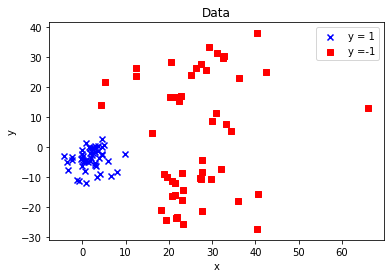

In [112]:
plt.scatter(X1[:,0], X1[:,1],c='b', marker='x', label='y = 1')
plt.scatter(X2[:,0], X2[:,1],c='r', marker='s', label='y =-1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data')
plt.show()

In [4]:
def kernel_gausiano(x,xprima):
    form = -(1/2)*((np.linalg.norm(x-xprima))**2)
    return math.exp(form)

In [10]:
def kernel_perceptron(datos):
    #Recibimos datos en forma de matrices donde la última columna deben de ser las clases (etiquetas)
    X = datos[:, :-1] 
    y = datos[:, -1]
    dim = X.shape[1]
    n = len(X)
    
    # Comenzamos todas las thetas en 0 para la primera iteración
    alpha = np.zeros(n, dtype=np.float64)
    
    condicion = True # bandera
    max_iters = 1000 #Hiperparámetro arbitrario que se puede cambiar
    j = 0 # contador de iteraciones
    tol = np.finfo(float).eps #Tolerancia
    
    #Creamos nuestra matriz con el Kernel
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = kernel_gausiano(X[i], X[j])
    
    while condicion:
        a = copy.deepcopy(alpha)
        for i in range(0,n) :
            if np.dot(y[i], np.sum(K[:,i] * alpha * y)) <= 0:
                alpha[i] += 1.0
        j+= 1
        condicion = abs(np.linalg.norm(alpha-a)) > tol and j < max_iters
        
    vecsop = alpha > 1e-5
    ind = np.arange(len(alpha))[vecsop]
    alpha = alpha[vecsop]
    vecsop_x = X[vecsop]
    vecsop_y = y[vecsop]
    
    return (vecsop_x, vecsop_y,j)

In [23]:
x,y,it = kernel_perceptron(data_1)
print("\tDatos ordenados\n")
print("X = ",x)
print("y = ",y)
print("Iteraciones = ",it)

	Datos nrdenados

X =  [[  1.36376123  -3.03120987]
 [-27.66461151 -27.58256036]
 [ 21.40422414  32.2144263 ]]
y =  [ 1. -1. -1.]
Iteraciones =  101


In [22]:
x,y,it = kernel_perceptron(train)
print("\tDatos no ordenados\n")
print("X = ",x)
print("y = ",y)
print("Iteraciones = ",it)

	Datos no ordenados

X =  [[  1.36376123  -3.03120987]
 [-27.66461151 -27.58256036]
 [ 21.40422414  32.2144263 ]]
y =  [ 1. -1. -1.]
Iteraciones =  101
